# Обработка и анализ признаков

Возьмите датасет вашего варианта из лабораторной работы № 1. Если вы раньше применяли бинаризацию целевого признака, то сейчас этого делать не нужно. Добавьте для тестирования искусственно сгенерированный признак random с рандомными вещественными значениями.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_path = 'bodyfat.csv'
data = pd.read_csv(file_path)

# добавляем новый столбец 'random' с рандомными вещественными значениями от 0 до 1
data['random'] = np.random.rand(len(data))

print(data.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist    random  
0  37.3   21.9    32.0     27.4   17.1  0.445601  
1  37.3   23.4    30.5     28.9   18.2  0.368849  
2  38.9   24.0    28.8     25.2   16.6  0.887983  
3  37.3   22.8    32.4     29.4   18.2  0.717904  
4  42.2   24.0    32.2     27.7   17.7  0.844266  


## Корреляции

Нарисуйте матрицу корреляций признаков. Вам поможет код:
```
corr = data.corr()
sns.heatmap(corr)
```

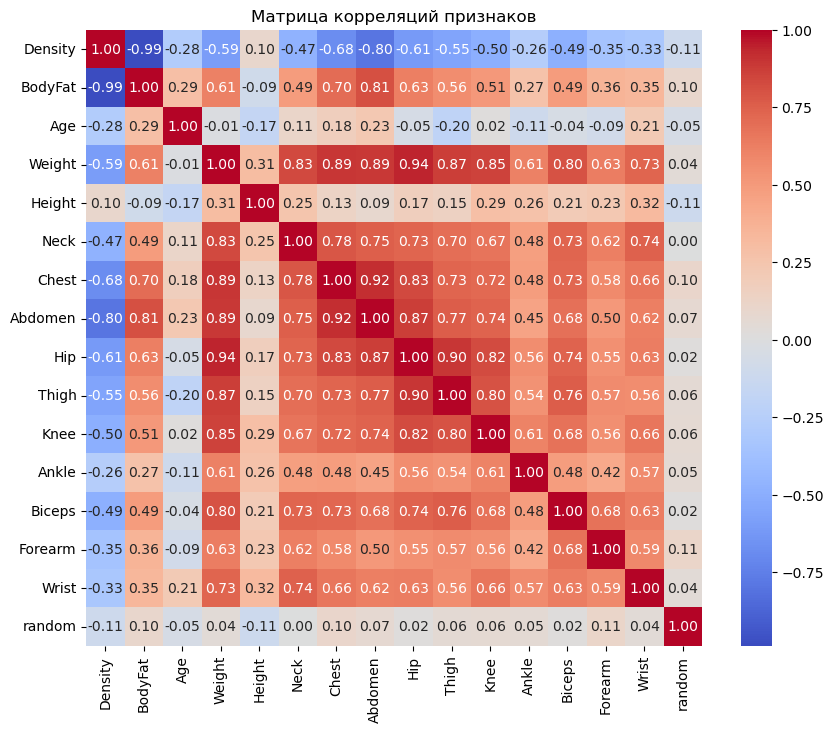

In [6]:
corr = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляций признаков')
plt.show()

Нарисуйте 4 графика рассеяния: два на осях самых коррелированных пар признаков и два - для некоррелированных пар. Скопируйте их в отчет, разместив рядом друг с другом. Чем коррелированные графики отличаются от некореллированных?

Самые коррелированные пары: [('Density', 'BodyFat'), ('Weight', 'Hip')]
Некоррелированные пары: [('Age', 'Weight'), ('random', 'Neck')]


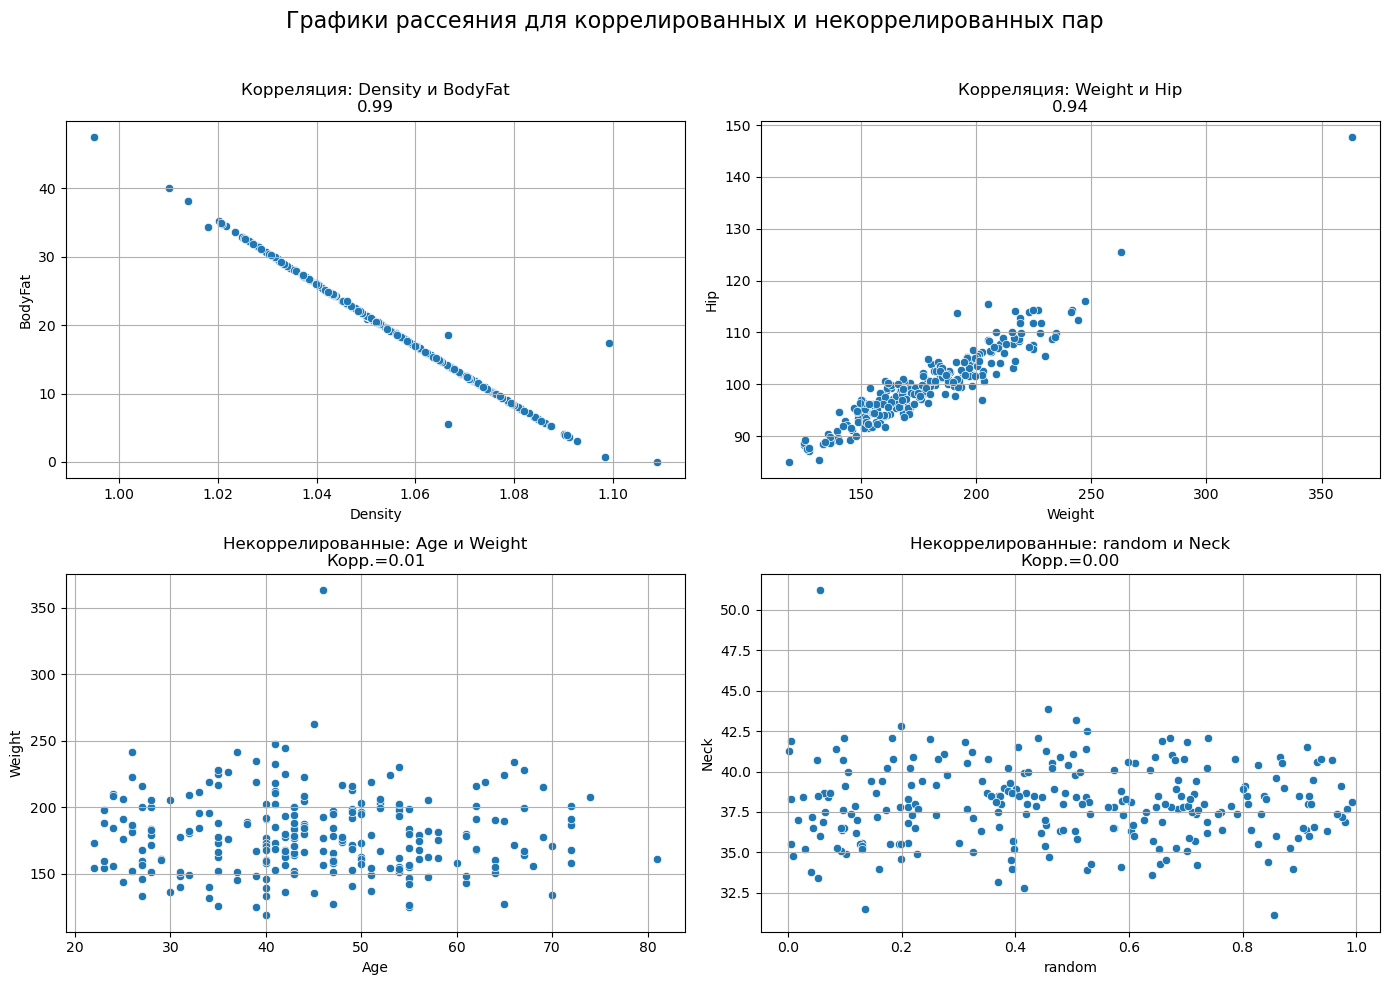

In [8]:
# Вычисляем корреляционную матрицу (без self-correlation)
corr = data.corr().abs()
np.fill_diagonal(corr.values, 0)

# Находим две самые скоррелированные пары признаков:
# Получаем пары с максимальным значением корреляции
corr_unstack = corr.unstack()
corr_sorted = corr_unstack.sort_values(ascending=False)

# Получаем первые две пары самых коррелированных признаков
top_corr_pairs = corr_sorted.drop_duplicates().head(2).index.tolist()

# Находим две некоррелированные пары — с корреляцией, близкой к нулю
low_corr_pairs = corr_sorted.drop_duplicates().tail(3).index.tolist()
low_corr_pairs.pop(2)
print('Самые коррелированные пары:', top_corr_pairs)
print('Некоррелированные пары:', low_corr_pairs)

# Создадим 4 графика рассеяния
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Графики рассеяния для коррелированных и некоррелированных пар', fontsize=16)

# Два графика для самых коррелированных пар
for i, (x_col, y_col) in enumerate(top_corr_pairs):
    ax = axes[0, i]
    sns.scatterplot(data=data, x=x_col, y=y_col, ax=ax)
    ax.set_title(f'Корреляция: {x_col} и {y_col}\n{corr.loc[x_col, y_col]:.2f}')
    ax.grid(True)

# Два графика для некоррелированных пар
for i, (x_col, y_col) in enumerate(low_corr_pairs):
    ax = axes[1, i]
    sns.scatterplot(data=data, x=x_col, y=y_col, ax=ax)
    ax.set_title(f'Некоррелированные: {x_col} и {y_col}\nКорр.={corr.loc[x_col, y_col]:.2f}')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

С какими признаками сильнее всего коррелирует целевой?

Два самых коррелированных с 'random': ['Forearm', 'Height']
Два самых некоррелированных с 'random': ['Biceps', 'Neck']


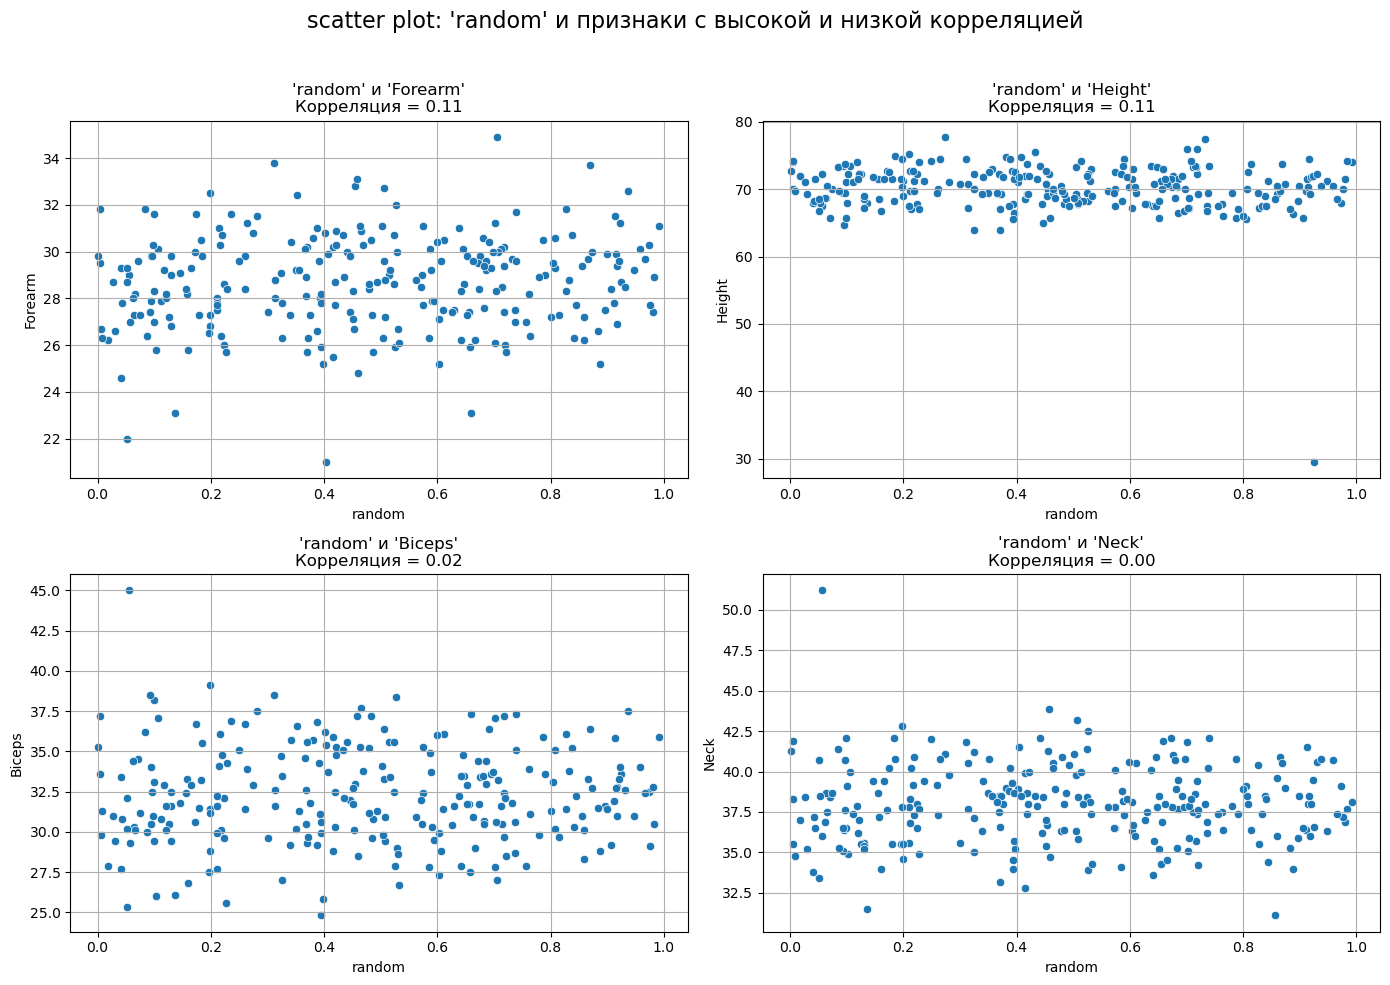

In [10]:
# Корреляции признаков с 'random', сортируем по абсолютному значению, исключая random сами с собой
corr_random = corr['random'].drop('random')
abs_corr_random = corr_random.abs().sort_values(ascending=False)

# Две самых коррелированных пары (с random)
top2_corr_features = abs_corr_random.head(2).index.tolist()

# Два самых некоррелированных признака (с corr близко к 0)
low_corr_features = abs_corr_random.tail(2).index.tolist()

print("Два самых коррелированных с 'random':", top2_corr_features)
print("Два самых некоррелированных с 'random':", low_corr_features)

# Рисуем 4 графика: random с двумя коррелированными и random с двумя некоррелированными
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("scatter plot: 'random' и признаки с высокой и низкой корреляцией", fontsize=16)

# Коррелированные
for i, feature in enumerate(top2_corr_features):
    ax = axes[0, i]
    sns.scatterplot(data=data, x='random', y=feature, ax=ax)
    ax.set_title(f"'random' и '{feature}'\nКорреляция = {corr.loc['random', feature]:.2f}")
    ax.grid(True)

# Некоррелированные
for i, feature in enumerate(low_corr_features):
    ax = axes[1, i]
    sns.scatterplot(data=data, x='random', y=feature, ax=ax)
    ax.set_title(f"'random' и '{feature}'\nКорреляция = {corr.loc['random', feature]:.2f}")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Важность признаков

Сравните разные подходы к определению "важных" признаков. Для этого постройте столбцовую диаграмму, в которой по оси х будут отмечены названия признаков. Каждому признаку соответсвует набор столбцов разного цвета, высота которых отражает важность в смысле разных определений. Нормируйте все важности одного типа на максимальную важность этого типа. Если признаков больше 7, разбейте диаграмму на несколько рисунков по 7 признаков в каждом. 

In [119]:
# Определяем целевой признак
target_name = 'Neck' 

# Признаки - все, кроме целевого
features = data.columns.drop(target_name)

X = data[features]
y = data[target_name]

Подходы к определению важности признака f:

* качество предсказания целевого признака моделью ExtraTrees по одному признаку f 

In [181]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

quality_scores = {}
etr_single = ExtraTreesRegressor(random_state=42, n_estimators=100)
import statistics
for f in features:
    X_f = X[[f]]
    etr_single.fit(X_f, y)
    score = cross_val_score(etr_single, X_f, y)
    quality_scores[f] = statistics.median(score)

print(quality_scores)

{'Density': -0.6318672477335097, 'BodyFat': -0.5237949868373042, 'Age': -0.1525600051013849, 'Weight': 0.46909520498652146, 'Height': -0.07997378234019115, 'Chest': 0.2781394292310201, 'Abdomen': 0.3188834111779987, 'Hip': 0.36725745246574015, 'Thigh': 0.12339416160437111, 'Knee': 0.0651382112429828, 'Ankle': -0.023696086737283517, 'Biceps': 0.18980677825772208, 'Forearm': 0.007424140269302715, 'Wrist': 0.41012541611420905, 'random': -0.1981558374199921}


* Свойство feature_importances_ модели ExtraTrees, обученной **на всех признаках** одновременно

In [177]:
from sklearn.ensemble import ExtraTreesRegressor

etr_all = ExtraTreesRegressor(random_state=42, n_estimators=100)
etr_all.fit(X, y)
feature_importances = dict(zip(features, etr_all.feature_importances_))

print(feature_importances)

{'Density': 0.01612864289441422, 'BodyFat': 0.015464111874866529, 'Age': 0.015845060061461542, 'Weight': 0.18051127188043406, 'Height': 0.014507957986906822, 'Chest': 0.1565897448461154, 'Abdomen': 0.11036570622693088, 'Hip': 0.05224688211939743, 'Thigh': 0.04695890713255321, 'Knee': 0.0471542306167087, 'Ankle': 0.028530878443197294, 'Biceps': 0.07404177422558679, 'Forearm': 0.10703021175719148, 'Wrist': 0.1149035200995622, 'random': 0.01972109983467319}


* Модуль коэффициента линейной модели (признаки должны быть нормированными!)

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Важен нормированный X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lr = LinearRegression()
lr.fit(X_scaled, y)
linear_coefs = dict(zip(features, np.abs(lr.coef_)))

print(linear_coefs)

{'Density': 0.051044983314586734, 'BodyFat': 0.24118476277973405, 'Age': 0.15797138235976038, 'Weight': 1.8214575491637748, 'Height': 0.06531118218086021, 'Chest': 0.1386372539499346, 'Abdomen': 0.4947580295184134, 'Hip': 0.8760222762097707, 'Thigh': 0.3894573587257162, 'Knee': 0.3468259144149713, 'Ankle': 0.14976068608861837, 'Biceps': 0.17899420806767863, 'Forearm': 0.24041096036694404, 'Wrist': 0.5677915085733719, 'random': 0.11619381438373329}


* Модуль коэффициента корреляции с целевым признаком

In [135]:
corrs = data.corr()[target_name][features].abs()

* Количество взаимной информации в f и целевом признаке (используйте mutual_info_regression для задачи регрессии и mutual_info_classif для задачи классификации)

In [138]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X, y, random_state=42)
mi_scores = dict(zip(features, mi))

Код для построения столбцовой диаграммы по датафрейму из важностей (см. лаб. работу №1):
```
importance = importance.melt(id_vars=['name'], value_vars=['quality', 'ExtraTrees', 'linear', 'corr', 'MI'])
sns.barplot(x='value', y='name', hue='variable', data=importance)
```

Какой самый важный признак? Какая важность оказалась у признака random?

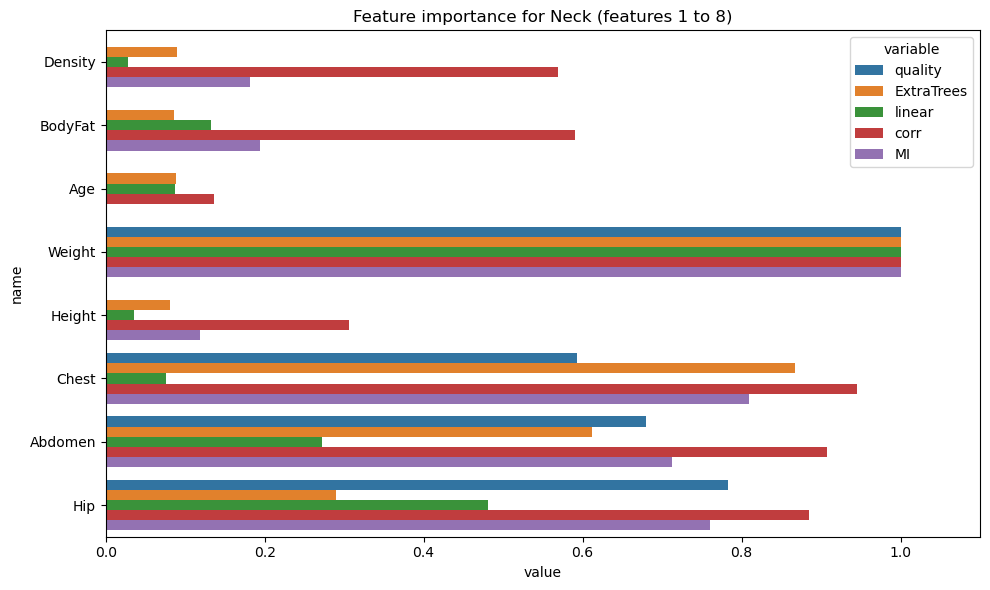

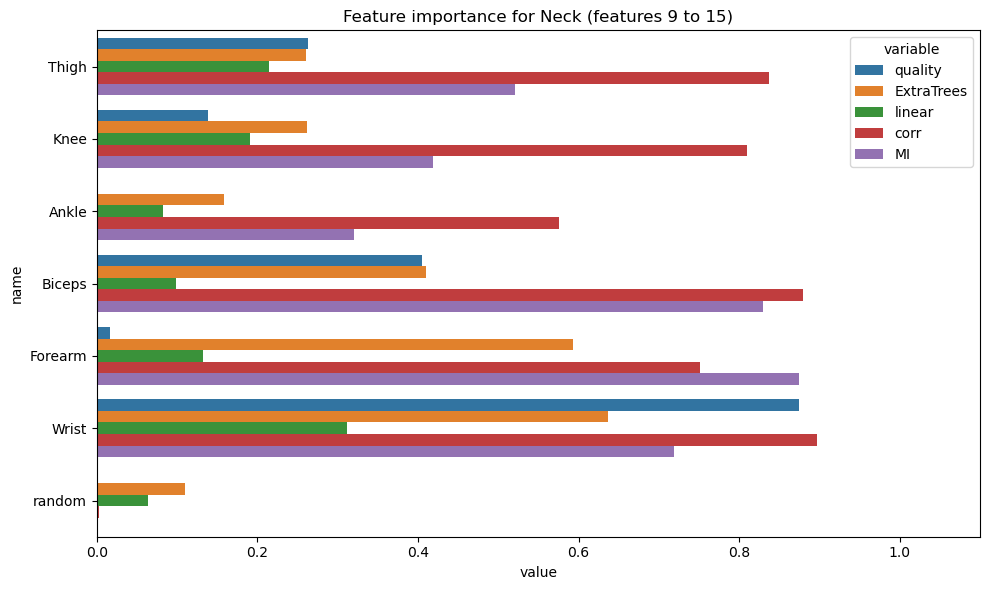

Самый важный признак: Weight - 5.0
Важности признака random:
      name   quality  ExtraTrees    linear      corr   MI  total_importance
14  random -0.422421    0.109251  0.063792  0.002735  0.0         -0.246643


In [183]:
# Собираем все в один датафрейм
df_importance = pd.DataFrame({
    'name': features,
    'quality': pd.Series(quality_scores),
    'ExtraTrees': pd.Series(feature_importances),
    'linear': pd.Series(linear_coefs),
    'corr': corrs,
    'MI': pd.Series(mi_scores)
}).reset_index(drop=True)

# Нормализация по каждой метрике
for col in ['quality', 'ExtraTrees', 'linear', 'corr', 'MI']:
    max_val = df_importance[col].max()
    if max_val > 0:
        df_importance[col] = df_importance[col] / max_val
    else:
        df_importance[col] = 0

# Функция для построения графиков по 7 признаков
def plot_importances(df, target_name, features_per_plot=8):
    n = len(df)
    for i in range(0, n, features_per_plot):
        subset = df.iloc[i:i+features_per_plot]
        importance = subset.melt(id_vars=['name'], value_vars=['quality', 'ExtraTrees', 'linear', 'corr', 'MI'],
                                 var_name='variable', value_name='value')
        plt.figure(figsize=(10, 6))
        sns.barplot(x='value', y='name', hue='variable', data=importance)
        plt.title(f'Feature importance for {target_name} (features {i+1} to {min(i+features_per_plot, n)})')
        plt.xlim(0, 1.1)
        plt.tight_layout()
        plt.show()

# Построение графиков
plot_importances(df_importance, target_name)

# Вывод самого важного признака по сумме всех нормированных метрик
df_importance['total_importance'] = df_importance[['quality', 'ExtraTrees', 'linear', 'corr', 'MI']].sum(axis=1)
most_important = df_importance.sort_values('total_importance', ascending=False).iloc[0]

print(f"Самый важный признак: {most_important['name']} - {most_important['total_importance']}")
print(f"Важности признака random:")
print(df_importance[df_importance['name'] == 'random'])

## Главные компоненты

1) Примените метод главных компонент к нормированной матрице объектов-признаков (sklearn.decomposition.PCA). Спроектируйте датасет на две главные компоненты (fit_transform) и постройте в плоскости этих компонент график рассеяния датасета, используя в качестве цвета значения целевого признака.  

In [223]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Определяем целевой признак
target_name = 'Neck' 

# Признаки - все, кроме целевого
features = data.columns.drop(target_name)

X = data[features]
y = data[target_name]

# Нормируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Создаем DataFrame для удобного просмотра
pc_df = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])

print("Весовые коэффициенты главных компонент для каждого исходного признака:")
print(pc_df)

pca_name = {}
for pc in pc_df.index:
    print(f"\nТоп признаков для {pc}:")
    print(pc_df.loc[pc].abs().sort_values(ascending=False).head(3))
    pca_name[pc] = pc_df.loc[pc].abs().sort_values(ascending=False).head(1)

Весовые коэффициенты главных компонент для каждого исходного признака:
      Density   BodyFat       Age    Weight    Height     Chest   Abdomen  \
PC1 -0.250900  0.255644  0.025415  0.336906  0.077918  0.318286  0.322669   
PC2 -0.423598  0.421460  0.458957 -0.093132 -0.451964  0.101334  0.192237   

          Hip     Thigh      Knee     Ankle    Biceps   Forearm     Wrist  \
PC1  0.323834  0.306063  0.301555  0.218398  0.289845  0.237553  0.260046   
PC2 -0.039555 -0.105851 -0.125383 -0.259796 -0.116805 -0.180606 -0.150973   

       random  
PC1  0.028458  
PC2  0.084181  

Топ признаков для PC1:
Weight     0.336906
Hip        0.323834
Abdomen    0.322669
Name: PC1, dtype: float64

Топ признаков для PC2:
Age        0.458957
Height     0.451964
Density    0.423598
Name: PC2, dtype: float64


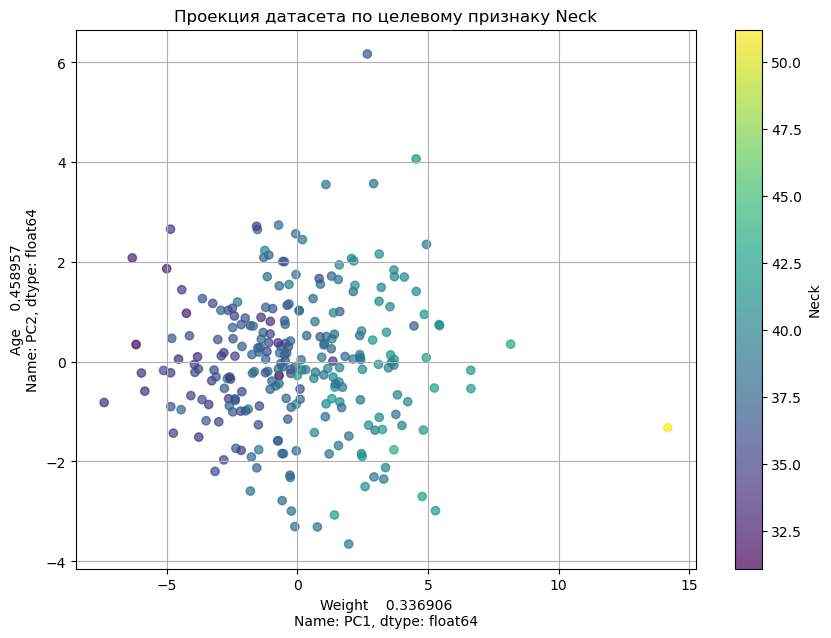

In [225]:
# Создаем DataFrame для удобного построения графика
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'target': y
})

# Построение scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['target'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label=target_name)
plt.xlabel(f'{pca_name['PC1']}')
plt.ylabel(f'{pca_name['PC2']}')
plt.title(f'Проекция датасета по целевому признаку {target_name}')
plt.grid(True)
plt.show()

2) Выведите координаты главной компоненты и соответсвующие им названия признаков (свойство components_). Анализируя вывод, выясните какие признаки меняются "в унисон" и соответствует ли это матрице корреляций. 

Координаты признаков в главных компонентах (pca.components_):
      Density   BodyFat       Age    Weight    Height     Chest   Abdomen  \
PC1 -0.250900  0.255644  0.025415  0.336906  0.077918  0.318286  0.322669   
PC2 -0.423598  0.421460  0.458957 -0.093132 -0.451964  0.101334  0.192237   

          Hip     Thigh      Knee     Ankle    Biceps   Forearm     Wrist  \
PC1  0.323834  0.306063  0.301555  0.218398  0.289845  0.237553  0.260046   
PC2 -0.039555 -0.105851 -0.125383 -0.259796 -0.116805 -0.180606 -0.150973   

       random  
PC1  0.028458  
PC2  0.084181  


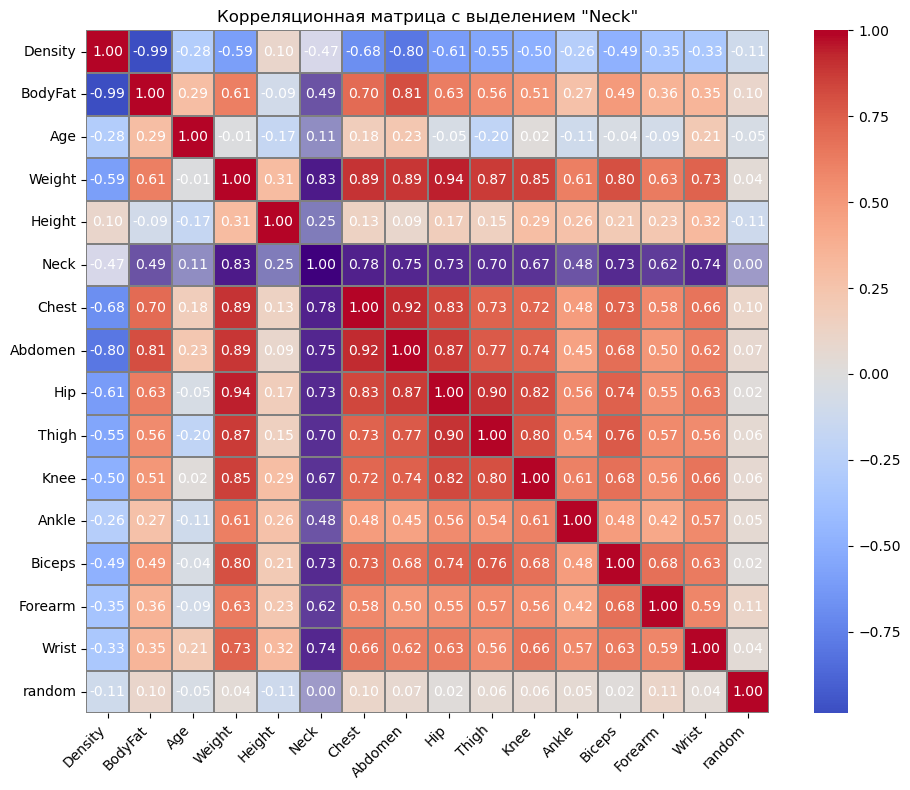

In [228]:
pc_df = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])
print("Координаты признаков в главных компонентах (pca.components_):")
print(pc_df)

corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix, dtype=bool)
idx = corr_matrix.columns.get_loc(target_name)

# Выделим строку и столбец
mask[idx, :] = True  # строка
mask[:, idx] = True  # столбец

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, square=True, linewidths=0.2)

# Создаем пустую матрицу с NaN для верхнего слоя
green_layer = np.full_like(corr_matrix, np.nan, dtype=float)

# Заполняем только строки и столбцы выделенного признака данными из corr_matrix
green_layer[idx, :] = corr_matrix.iloc[idx, :]
green_layer[:, idx] = corr_matrix.iloc[:, idx]

# Верхний слой — зеленая карта с прозрачным фоном (NaN)
sns.heatmap(green_layer, annot=False, fmt=".2f", cmap='Purples', center=0, square=True,
            linewidths=0.3, linecolor='grey', cbar=False, alpha=1)

for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        plt.text(j+0.5, i+0.5, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='white')

feature_names = corr_matrix.columns.tolist()

plt.xticks(ticks=np.arange(len(feature_names)) + 0.5, labels=feature_names, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(feature_names)) + 0.5, labels=feature_names, rotation=0)

plt.title(f'Корреляционная матрица с выделением "{target_name}"')
plt.tight_layout()
plt.show()

3) Примените PCA в качестве генеративной модели. Эффектнее всего такая генерация выглядит для датасета с изображениями, но мы попробуем применить аналогичную операцию и для наших данных. Для этого на графике рассеяния выберите какие-нибудь два набора значений главных компонент в областях разных классов (разных значений целевого признака - для регрессии). Причем выберите так, чтобы этим значениям не соответствовала никакая точка из обучающей выборки. После этого примените обратную трансформацию и найдите признаки, соответсвующие этим двум наборам. Запишите в отчете эти два набора в таблицу вместе с 10 другими случайными объектами. Насколько эти два искусственно построенных объекта реальны? Сможете ли вы отличить реальные объекты от искусственно сгенерированных?

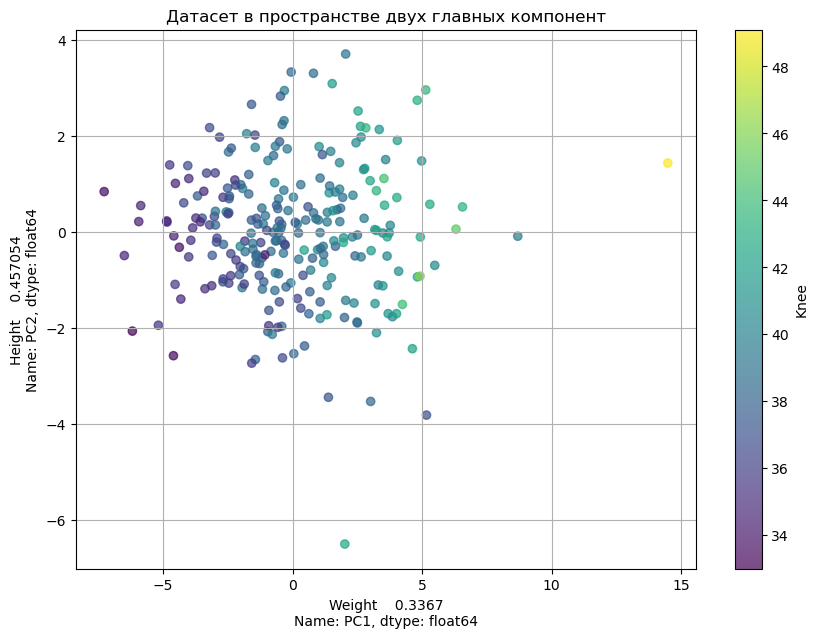

In [198]:
# 1. Проекция на две главные компоненты (если ещё не была построена)
X_pca = pca.transform(X_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label=target_name)
plt.xlabel(f'{pca_name['PC1']}')
plt.ylabel(f'{pca_name['PC2']}')
plt.title('Датасет в пространстве двух главных компонент')
plt.grid(True)
plt.show()

In [230]:
new_point1 = np.array([0.5, -1.5])
new_point2 = np.array([2, -6])

# Убедимся, что этих точек нет в X_pca
print("Близки ли новые точки к существующим данным? (расстояния)")
print(np.min(np.linalg.norm(X_pca - new_point1, axis=1)))
print(np.min(np.linalg.norm(X_pca - new_point2, axis=1)))

Близки ли новые точки к существующим данным? (расстояния)
0.17207172730054865
2.344611704254868


In [232]:
# 3. Обратное преобразование — из PCA-пространства в нормированные признаки
new_points_pca = np.vstack([new_point1, new_point2])
new_points_norm = pca.inverse_transform(np.hstack([new_points_pca]))  

In [234]:
# 4. Обратное масштабирование в оригинальные признаки
new_points_orig = scaler.inverse_transform(new_points_norm)

# Создаем DataFrame с обратно преобразованными данными
df_new = pd.DataFrame(new_points_orig, columns=X.columns)

In [236]:
# 5. Добавим 10 случайных реальных объектов
random_idx = np.random.choice(X.shape[0], size=10, replace=False)
df_real = X.iloc[random_idx].copy()

# Все объединяем в один DataFrame, добавим столбец "Тип", чтобы отличить
df_new['Type'] = 'artificial'
df_real['Type'] = 'real'

df_combined = pd.concat([df_new, df_real], ignore_index=True)

     Density   BodyFat        Age      Weight     Height       Chest  \
0   1.065260  14.93825  36.386277  187.962695  72.769515  100.884297   
1   1.094317   2.30062  10.890344  215.077567  80.631630  101.064567   
2   1.060300  16.90000  36.000000  176.250000  71.500000   98.200000   
3   1.052200  20.40000  49.000000  212.750000  75.000000  104.700000   
4   1.108900   0.00000  40.000000  118.500000  68.000000   79.300000   
5   1.083000   7.10000  26.000000  186.250000  74.500000  101.500000   
6   1.081100   7.90000  34.000000  131.500000  67.500000   88.600000   
7   1.034000  28.70000  43.000000  200.500000  71.500000  107.200000   
8   1.046200  23.10000  64.000000  160.000000  65.750000  104.300000   
9   1.084700   6.30000  54.000000  155.250000  69.250000   89.300000   
10  1.041400  25.30000  22.000000  154.000000  66.250000   95.800000   
11  1.079500   8.50000  47.000000  165.250000  70.500000   97.200000   

       Abdomen         Hip      Thigh       Knee      Ankle    

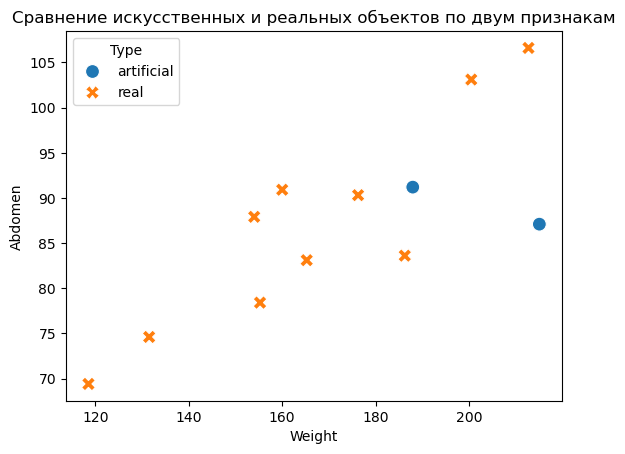

In [238]:
# 6. Выводим таблицу (можно сохранить в файл)
print(df_combined)

sns.scatterplot(data=df_combined, x=X.columns[3], y=X.columns[6], hue='Type', style='Type', s=100)
plt.title('Сравнение искусственных и реальных объектов по двум признакам')
plt.show()

4) Найдите две главные компоненты методом PLS (sklearn.cross_decomposition.PLSRegression, StandardScaler использовать не нужно - он уже встроен в PLSRegression). Нарисуйте аналогичный п.1 график рассеяния и поместите оба графика в отчете рядом друг с другом

Полезный код:

```
pca_transformer = make_pipeline(StandardScaler(), PCA(n_components=2))
pca_features = pca_transformer.fit_transform(data.loc[:, data.columns != label])
```

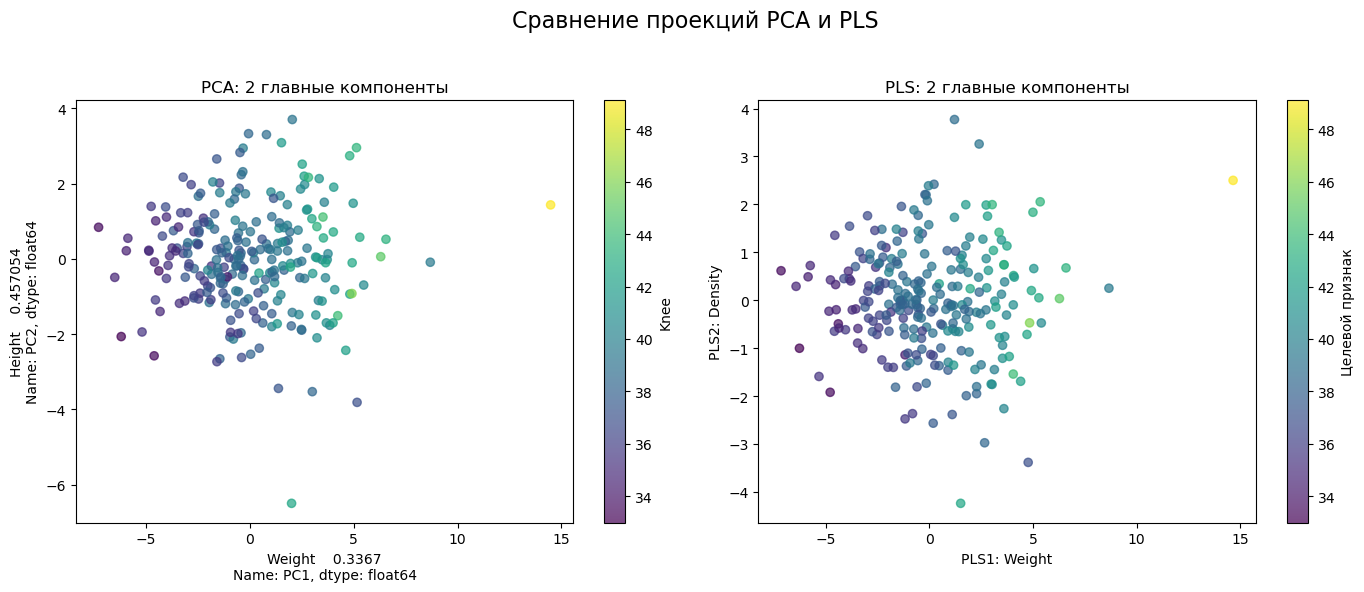

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_decomposition import PLSRegression

# Обучение PLS с 2 компонентами
pls = PLSRegression(n_components=2)
pls.fit(X, y)

X_pls = pls.transform(X)

pls_df = pd.DataFrame(pls.x_weights_, index=X.columns, columns=['PLS1', 'PLS2'])
pls_name = {}

for comp in pls_df.columns:  # 'PLS1', 'PLS2'
    #print(f"\nТоп признаков для {comp}:")
    top_features = pls_df[comp].abs().sort_values(ascending=False).head(3)
    #print(top_features)
    pls_name[comp] = top_features.index[0]
#print(pls_name)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# График PCA
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[0].set_xlabel(f'{pca_name['PC1']}')
axes[0].set_ylabel(f'{pca_name['PC2']}')
axes[0].set_title('PCA: 2 главные компоненты')
cbar1 = fig.colorbar(scatter1, ax=axes[0])
cbar1.set_label(f'{target_name}')

# График PLS
scatter2 = axes[1].scatter(X_pls[:, 0], X_pls[:, 1], c=y, cmap='viridis', alpha=0.7)
axes[1].set_title('PLS: 2 главные компоненты')
axes[1].set_xlabel(f'PLS1: {pls_name['PLS1']}')
axes[1].set_ylabel(f'PLS2: {pls_name['PLS2']}')
cbar2 = fig.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Целевой признак')

plt.suptitle('Сравнение проекций PCA и PLS', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [213]:
pc_df = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])
print("Коэффициенты для PCA компонентов:")
print(pc_df)

Коэффициенты для PCA компонентов:
      Density   BodyFat       Age    Weight    Height      Neck     Chest  \
PC1 -0.250829  0.255750  0.029865  0.336700  0.076674  0.298538  0.321543   
PC2  0.424643 -0.422017 -0.452239  0.097609  0.457054  0.092583 -0.092109   

      Abdomen       Hip     Thigh     Ankle    Biceps   Forearm     Wrist  \
PC1  0.324120  0.321093  0.302588  0.213482  0.292463  0.240706  0.263783   
PC2 -0.187577  0.038404  0.102993  0.255520  0.127548  0.193349  0.164223   

       random  
PC1  0.026090  
PC2 -0.091644  


In [215]:
pls_df = pd.DataFrame(pls.x_weights_, index=X.columns, columns=['PLS1', 'PLS2'])
print("Коэффициенты для PLS компонентов (x_weights_):")
print(pls_df)

Коэффициенты для PLS компонентов (x_weights_):
             PLS1      PLS2
Density -0.206753  0.412135
BodyFat  0.212443 -0.404215
Age      0.007315 -0.158262
Weight   0.356324  0.181257
Height   0.119470  0.376455
Neck     0.280829 -0.222523
Chest    0.300496 -0.228808
Abdomen  0.307881 -0.159295
Hip      0.343922  0.225328
Thigh    0.333772  0.308710
Ankle    0.255437  0.386642
Biceps   0.283461 -0.130432
Forearm  0.232170 -0.125835
Wrist    0.277530  0.106680
random   0.025792  0.009854
